In [134]:
import numpy as np
import pandas as pd
import re

In [135]:
attacks_clean = pd.read_csv("../../attacks2_clean.csv")
attacks_clean.head()

,Unnamed: 0,Date,Country,Activity,Fatal (Y/N)
0,0,2018,USA,Water sports,N
1,1,2018,USA,Others,N
2,2,2018,USA,Water sports,N
3,3,2018,AUSTRALIA,Water sports,N
4,4,2018,MEXICO,Water sports,N


In [136]:
attacks_clean["Water Sports"] = np.where(attacks_clean["Activity"].isin(["Water sports"]), 1, 0)
attacks_clean["Other activity"] = np.where(attacks_clean["Activity"].isin(["Others"]), 1, 0)

In [137]:
attacks_clean.head()

,Unnamed: 0,Date,Country,Activity,Fatal (Y/N),Water Sports,Other activity
0,0,2018,USA,Water sports,N,1,0
1,1,2018,USA,Others,N,0,1
2,2,2018,USA,Water sports,N,1,0
3,3,2018,AUSTRALIA,Water sports,N,1,0
4,4,2018,MEXICO,Water sports,N,1,0


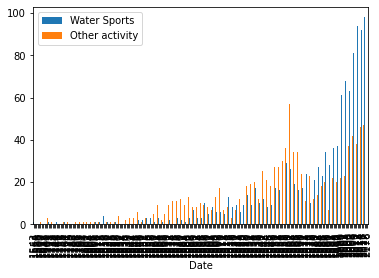

In [138]:
attacks_clean.groupby("Date").agg({"Water Sports":"sum","Other activity":"sum"}).plot.bar()

In [139]:
años_bins = list(range(1539,2020,20))
años_labels = list(range(1550,2020,20))

In [140]:
attacks_clean["Veintena"] = pd.cut(attacks_clean["Date"],bins=años_bins,labels=años_labels)

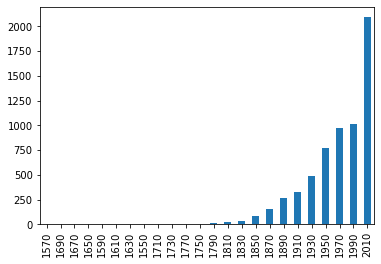

In [141]:
attacks_clean["Veintena"].value_counts().sort_values(ascending=True).plot.bar()

In [142]:
filter_attacks = attacks_clean.Date >=1900

In [143]:
attacks_clean = attacks_clean[filter_attacks]

In [144]:
attacks_clean

,Unnamed: 0,Date,Country,Activity,Fatal (Y/N),Water Sports,Other activity,Veintena
0,0,2018,USA,Water sports,N,1,0,2010
1,1,2018,USA,Others,N,0,1,2010
2,2,2018,USA,Water sports,N,1,0,2010
3,3,2018,AUSTRALIA,Water sports,N,1,0,2010
4,4,2018,MEXICO,Water sports,N,1,0,2010
...,...,...,...,...,...,...,...,...
6276,6295,1906,AUSTRALIA,Others,Y,0,1,1910
6277,6296,1906,AUSTRALIA,Water sports,Y,1,0,1910
6278,6297,1903,AUSTRALIA,Water sports,Y,1,0,1910
6279,6298,1903,AUSTRALIA,Water sports,Y,1,0,1910


In [145]:
años_bins = list(range(1899,2021,10))
años_labels = list(range(1900,2020,10))
attacks_clean["Decada"] = pd.cut(attacks_clean["Date"],bins=años_bins,labels=años_labels)

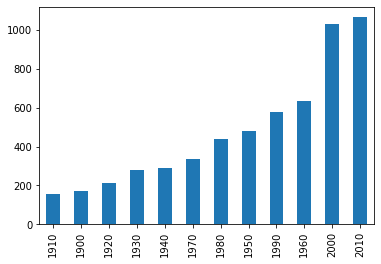

In [146]:
attacks_clean["Decada"].value_counts().sort_values().plot.bar()

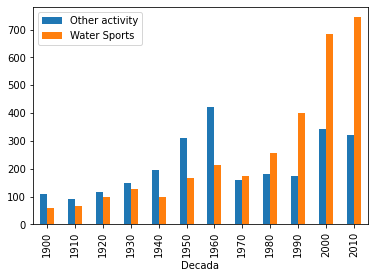

In [147]:
attacks_clean.groupby("Decada").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()

In [148]:
#filter_attacks = attacks_clean.Decada >=1980

In [149]:
#attacks_clean = attacks_clean[filter_attacks]

In [150]:
#attacks_clean.groupby("Date").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()

In [151]:
attacks_clean["Country"].value_counts()

USA                      2098
AUSTRALIA                1194
SOUTH AFRICA              554
PAPUA NEW GUINEA          132
BRAZIL                    108
                         ... 
SOUTH CHINA SEA             1
PUERTO RICO                 1
CURACAO                     1
NORTH ATLANTIC OCEAN        1
ST. MAARTIN                 1
Name: Country, Length: 185, dtype: int64

In [152]:
filter_country = (attacks_clean["Country"]=="USA")|(attacks_clean["Country"]=="AUSTRALIA")

In [153]:
attacks_clean = attacks_clean[filter_country]

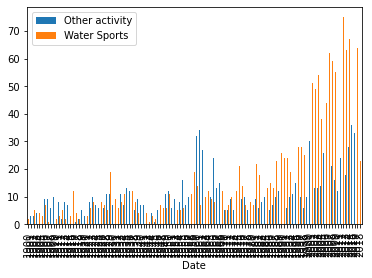

In [154]:
attacks_clean.groupby("Date").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()

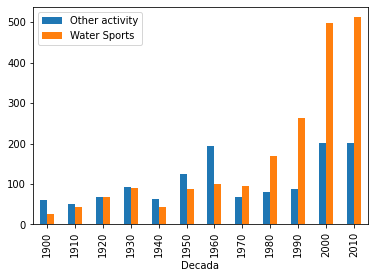

In [156]:
attacks_clean.groupby("Decada").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()